<h1><center>Loading all the libraries</h1>

In [56]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import tensorflow as tf
import keras
from keras import layers, Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from matplotlib import pyplot as plt

<h1><center>Loading the dataset</h1>

In [57]:
iris_data = load_iris()

X = iris_data.data
target = iris_data.target.reshape(-1,1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(target)

<h2><center>Training and testing split</h2>

In [58]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2,stratify=y)

<h1><center> Neural Network</h1>

In [94]:
def classifier():
    network = Sequential([
        keras.layers.Dense(10,activation='relu',input_shape=(4,),name="Input_Layer"),
        keras.layers.Dense(20,activation='relu',name="Hidden_Layer_1"),
        keras.layers.Dense(3,activation='softmax',name="Output_layer")
    ])
    opt = keras.optimizers.Adam(learning_rate=0.1)
    network.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
    return network

<h2><center>K-Fold cross validation with k=5</h2>
<img src = "k_fold.png" height="800" width="600">

In [95]:
network = KerasClassifier(build_fn=classifier,epochs=15,batch_size=10,verbose=0)

k_fold = KFold(n_splits=5,shuffle=True,random_state=42)

accuracy = cross_val_score(network,train_x,train_y,cv=k_fold)

/var/folders/32/dhq7gf0n5yq0162cwcsynrtm0000gn/T/ipykernel_57001/163322404.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  network = KerasClassifier(build_fn=classifier,epochs=15,batch_size=10,verbose=0)
2023-03-28 21:56:42.518936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-28 21:56:44.210695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-28 21:56:44.504878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-28 21:56:46.126827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-28 21:56:46.397

<h4><center>Accuracy Scores</h4>

In [96]:
for i in range(len(accuracy)):
    print(f"The accuracy on fold {i+1} is: {accuracy[i]*100}")
print("The mean accuracy is: ",accuracy.mean()*100)

The accuracy on fold 1 is: 95.83333730697632
The accuracy on fold 2 is: 95.83333730697632
The accuracy on fold 3 is: 87.5
The accuracy on fold 4 is: 95.83333730697632
The accuracy on fold 5 is: 95.83333730697632
The mean accuracy is:  94.16666984558105


<h2><center>Model Architecture</h2>

In [97]:
network = classifier()
network.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                50        
                                                                 
 Hidden_Layer_1 (Dense)      (None, 20)                220       
                                                                 
 Output_layer (Dense)        (None, 3)                 63        
                                                                 
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = network.fit(train_x,train_y,epochs=30,validation_split=0.2,verbose=0)

2023-03-28 21:57:03.649556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-28 21:57:03.887517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


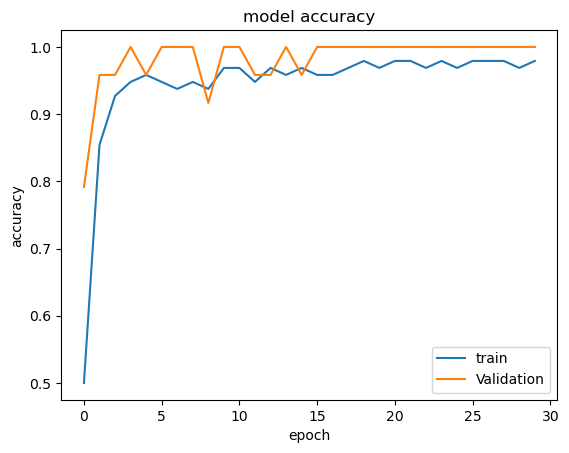

In [99]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='lower right')
plt.show()

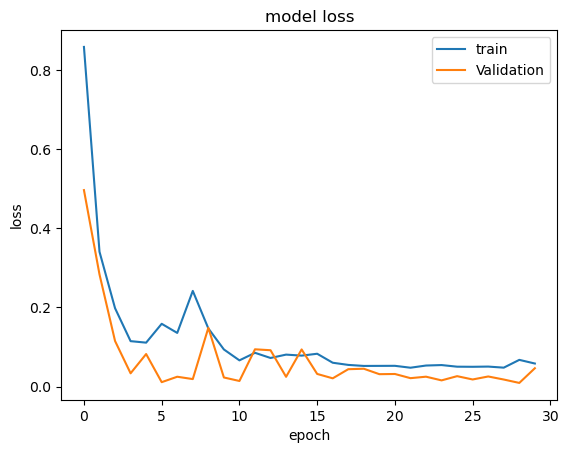

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

In [101]:
loss,accuracy = network.evaluate(test_x,test_y,verbose=0)
print(f"The loss is: {loss*100}")
print(f"The accuracy is: {accuracy*100}")

The loss is: 13.008353114128113
The accuracy is: 93.33333969116211


In [102]:
from sklearn import metrics

pred_y = network.predict(test_x,verbose=0)

for i in range(len(pred_y)):
    for j in range(len(pred_y[0])):
        if(pred_y[i][j] >= 0.5):
            pred_y[i][j] = 1
        else:
            pred_y[i][j]=0

2023-03-28 21:57:22.392710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [103]:
y = []
y_pred = []

for i in range(len(test_y)):
    if test_y[i][0]==1:
        y.append('Setosa')
    if test_y[i][1]==1:
        y.append('Virginica')
    if test_y[i][2]==1:
        y.append('Versicolor')

for i in range(len(pred_y)):
    if pred_y[i][0]==1:
        y_pred.append('Setosa')
    elif pred_y[i][1]==1:
        y_pred.append('Virginica')
    else:
        y_pred.append('Versicolor')

In [104]:
print('Accuracy score is :', metrics.accuracy_score(y, y_pred)*100)
print('Precision score is :', metrics.precision_score(y, y_pred,average='weighted')*100)
print('Recall score is :', metrics.recall_score(y, y_pred,average='weighted')*100)

print('\t\tClassification Report:\n', metrics.classification_report(y, y_pred,target_names=["Setosa", "Virginica", "Versicolor"]))

Accuracy score is : 93.33333333333333
Precision score is : 94.44444444444446
Recall score is : 93.33333333333333
		Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
   Virginica       1.00      0.80      0.89        10
  Versicolor       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



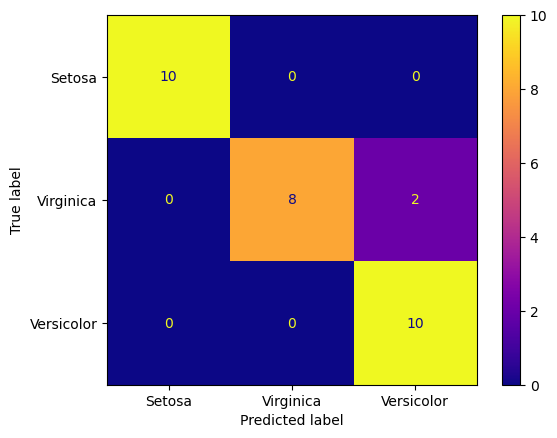

In [105]:
cm = metrics.confusion_matrix(y,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Setosa','Virginica','Versicolor'])
cm_display.plot(cmap='plasma')